#Importing Dependencies



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Data Collection and Pre-Processing

In [ ]:
# loading the dataset from csv file to Pandas DataFrame
titanic_data = pd.read_csv('/content/train.csv')

In [ ]:
titanic_data.head() # printing first 5 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.shape # number of rows and columns

(891, 12)

In [ ]:
titanic_data.info() # getting some info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.isnull().sum() # checking the number of missing values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Handling the Missing Values

In [ ]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1) # dropping the 'Cabin' column
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True) # filling missing values with the mean value

/tmp/ipython-input-3911184339.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True) # filling missing values with the mean value


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True) # filling missing values with the most frequent value

/tmp/ipython-input-1504318624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True) # filling missing values with the most frequent value


In [ ]:
titanic_data.isnull().sum() # checking the number of missing values again

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Data Analysis

In [ ]:
titanic_data.describe() # getting statistical summary of the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data['Survived'].value_counts() # checking how many survived and not survived

,count
Survived,
0,549
1,342


# Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

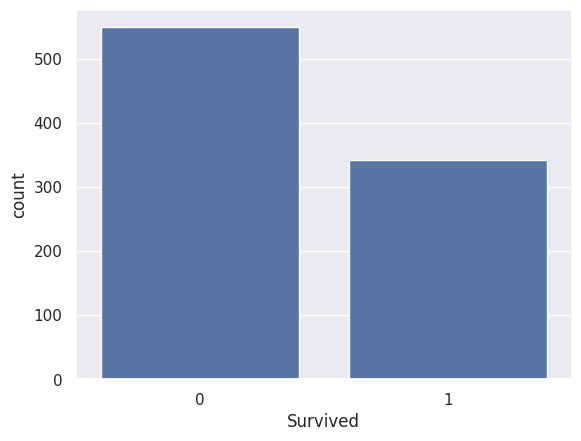

In [ ]:
sns.set()
sns.countplot(x='Survived', data = titanic_data) # countplot for survived column

In [ ]:
titanic_data['Sex'].value_counts() # checking how many male and female

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

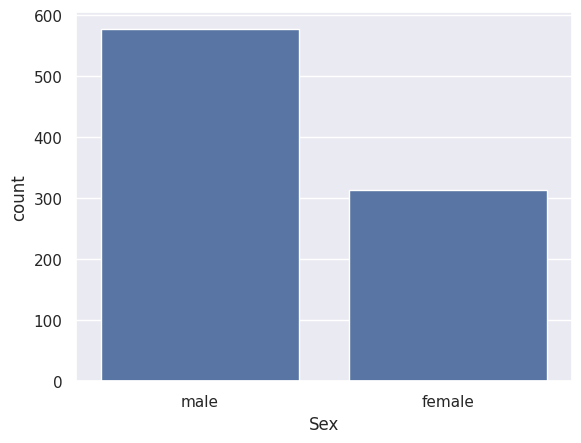

In [ ]:
sns.set()
sns.countplot(x='Sex', data = titanic_data) # countplot for sex column

<Axes: xlabel='Sex', ylabel='count'>

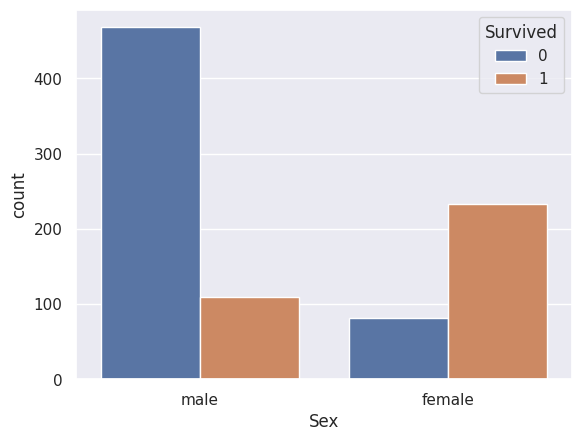

In [ ]:
sns.countplot(x='Sex', hue='Survived', data = titanic_data) # countplot for sex column with hue survived

<Axes: xlabel='Pclass', ylabel='count'>

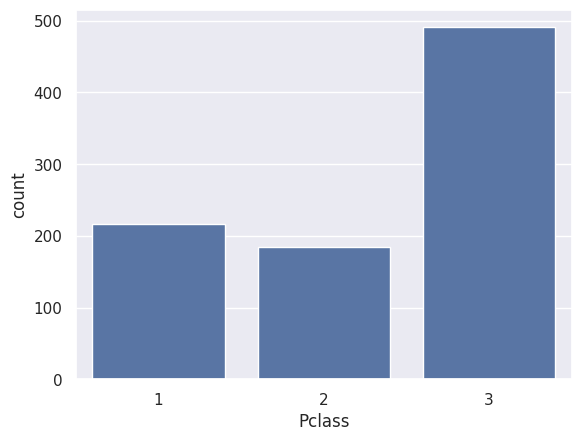

In [ ]:
sns.countplot(x='Pclass', data = titanic_data) # count plot of classes

<Axes: xlabel='Pclass', ylabel='count'>

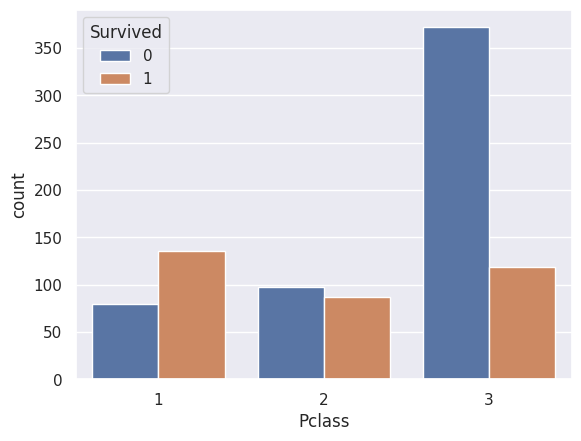

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data = titanic_data) # countplot of Pclass and survived

# Encoding the Categorical Column

In [ ]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) # replacing categorical values with numerical values

/tmp/ipython-input-4192454667.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) # replacing categorical values with numerical values


In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Separating Features and Targets

In [ ]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis = 1)
Y = titanic_data['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [ ]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


#Splitting Training and Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(891,) (712,) (179,)


# Model Training

## Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train) # training the model

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

## Accuracy Score

In [ ]:
X_train_pediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_pediction)

In [ ]:
print(X_train_pediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [ ]:
print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 0.8075842696629213


In [ ]:
X_test_pediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_pediction)

In [ ]:
print(X_test_pediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [ ]:
print('Accuracy score of testing data:', testing_data_accuracy)

Accuracy score of testing data: 0.7821229050279329


In [ ]:
print("\nClassification Report:\n", classification_report(Y_test, X_test_pediction))
print("ROC-AUC:", roc_auc_score(Y_test, model.predict_proba(X_test)[:,1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

ROC-AUC: 0.8281012658227849


## Confusion Matrix

Confusion Matrix:
 [[91  9]
 [30 49]]


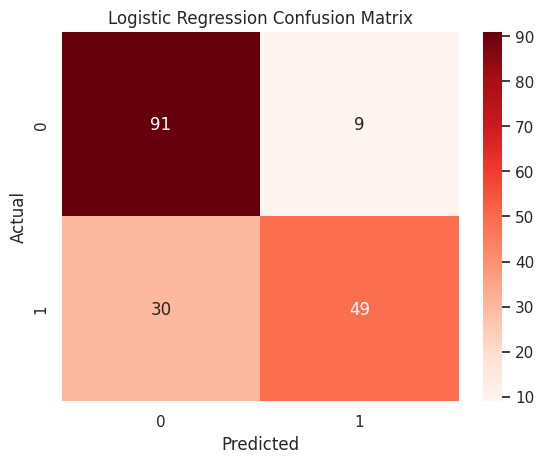

In [ ]:
cm = confusion_matrix(Y_test, X_test_pediction)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train) # training the model

DecisionTreeClassifier(random_state=42)

## Model Evaluation

Accuracy Score

In [ ]:
dt_train_pred = dt_model.predict(X_train)
dt_train_acc = accuracy_score(Y_train, dt_train_pred)
print("Accuracy score of training data:", dt_train_acc)

dt_test_pred = dt_model.predict(X_test)
dt_test_acc = accuracy_score(Y_test, dt_test_pred)
print("Accuracy score of testing data:", dt_test_acc)

print("\nClassification Report:\n", classification_report(Y_test, dt_test_pred))
print("ROC-AUC:", roc_auc_score(Y_test, dt_model.predict_proba(X_test)[:,1]))

Accuracy score of training data: 0.9859550561797753
Accuracy score of testing data: 0.7877094972067039

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.78      0.72      0.75        79

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

ROC-AUC: 0.7942405063291138


Confusion Matrix

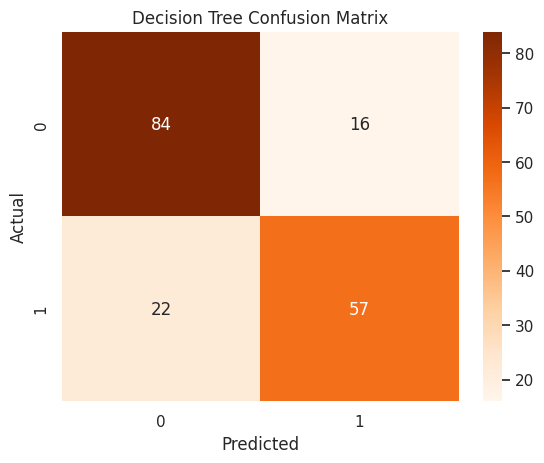

In [ ]:
cm = confusion_matrix(Y_test, dt_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

Accuracy Score

In [ ]:
rf_train_pred = rf_model.predict(X_train)
rf_train_acc = accuracy_score(Y_train, rf_train_pred)
print("Accuracy score of training data:", rf_train_acc)

rf_test_pred = rf_model.predict(X_test)
rf_test_acc = accuracy_score(Y_test, rf_test_pred)
print("Accuracy score of testing data:", rf_test_acc)

print("\nClassification Report:\n", classification_report(Y_test, rf_test_pred))
print("ROC-AUC:", roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:,1]))

Accuracy score of training data: 0.9859550561797753
Accuracy score of testing data: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.81      0.72      0.77        79

    accuracy                           0.80       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179

ROC-AUC: 0.8615822784810128


Confusion Matrix

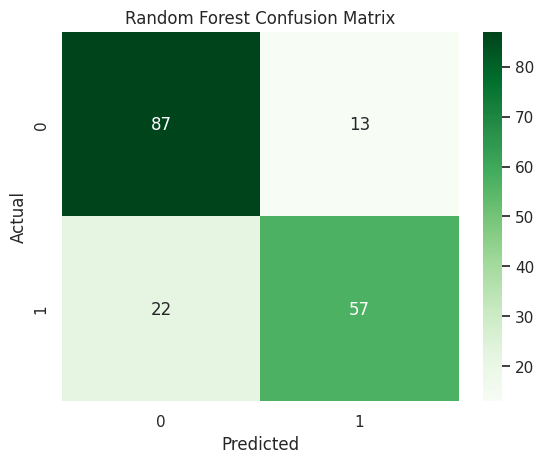

In [ ]:
cm = confusion_matrix(Y_test, rf_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# KNN-Neighbours

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

# Model Evaluation

Accuracy Score

In [ ]:
knn_train_pred = knn_model.predict(X_train)
knn_train_acc = accuracy_score(Y_train, knn_train_pred)
print("Accuracy score of training data:", knn_train_acc)

knn_test_pred = knn_model.predict(X_test)
knn_test_acc = accuracy_score(Y_test, knn_test_pred)
print("Accuracy score of testing data:", knn_test_acc)

print("\nClassification Report:\n", classification_report(Y_test, knn_test_pred))
print("ROC-AUC:", roc_auc_score(Y_test, knn_model.predict_proba(X_test)[:,1]))

Accuracy score of training data: 0.8047752808988764
Accuracy score of testing data: 0.6759776536312849

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.82      0.74       100
           1       0.68      0.49      0.57        79

    accuracy                           0.68       179
   macro avg       0.68      0.66      0.66       179
weighted avg       0.68      0.68      0.67       179

ROC-AUC: 0.7232911392405064


Confusion Matrix

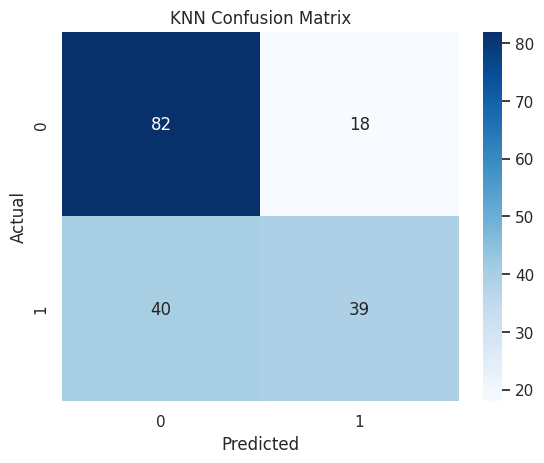

In [ ]:
cm = confusion_matrix(Y_test, knn_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Support Vector Machine (SVM)

In [ ]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, Y_train)

SVC(probability=True, random_state=42)

# Model Evaluation

Accuracy Score

In [ ]:
svm_train_pred = svm_model.predict(X_train)
svm_train_acc = accuracy_score(Y_train, svm_train_pred)
print("Accuracy score of training data:", svm_train_acc)

svm_test_pred = svm_model.predict(X_test)
svm_test_acc = accuracy_score(Y_test, svm_test_pred)
print("Accuracy score of testing data:", svm_test_acc)

print("\nClassification Report:\n", classification_report(Y_test, svm_test_pred))
print("ROC-AUC:", roc_auc_score(Y_test, svm_model.predict_proba(X_test)[:,1]))

Accuracy score of training data: 0.6797752808988764
Accuracy score of testing data: 0.6368715083798883

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.95      0.75       100
           1       0.79      0.24      0.37        79

    accuracy                           0.64       179
   macro avg       0.70      0.60      0.56       179
weighted avg       0.69      0.64      0.58       179

ROC-AUC: 0.7329113924050632


Confusion Matrix

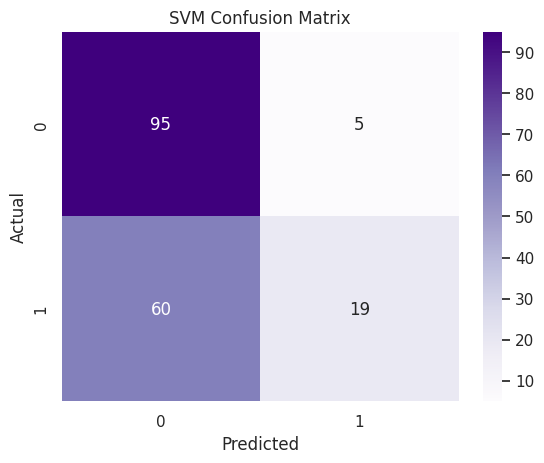

In [ ]:
cm = confusion_matrix(Y_test, svm_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Final Model Comparission

##Collect results into a dictionary

In [ ]:
summary = {
    "Logistic Regression": {
        "Train Accuracy": training_data_accuracy,
        "Test Accuracy": testing_data_accuracy,
        "ROC-AUC": roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])
    },
    "Decision Tree": {
        "Train Accuracy": dt_train_acc,
        "Test Accuracy": dt_test_acc,
        "ROC-AUC": roc_auc_score(Y_test, dt_model.predict_proba(X_test)[:,1])
    },
    "Random Forest": {
        "Train Accuracy": rf_train_acc,
        "Test Accuracy": rf_test_acc,
        "ROC-AUC": roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:,1])
    },
    "KNN": {
        "Train Accuracy": knn_train_acc,
        "Test Accuracy": knn_test_acc,
        "ROC-AUC": roc_auc_score(Y_test, knn_model.predict_proba(X_test)[:,1])
    },
    "SVM": {
        "Train Accuracy": svm_train_acc,
        "Test Accuracy": svm_test_acc,
        "ROC-AUC": roc_auc_score(Y_test, svm_model.predict_proba(X_test)[:,1])
    }
}


##Convert to DataFrame

In [ ]:
summary_df = pd.DataFrame(summary).T
print("Model Performance Summary:\n")
print(summary_df)

Model Performance Summary:

                     Train Accuracy  Test Accuracy   ROC-AUC
Logistic Regression        0.807584       0.782123  0.828101
Decision Tree              0.985955       0.787709  0.794241
Random Forest              0.985955       0.804469  0.861582
KNN                        0.804775       0.675978  0.723291
SVM                        0.679775       0.636872  0.732911


## Plot comparison (Test Accuracy & ROC-AUC)

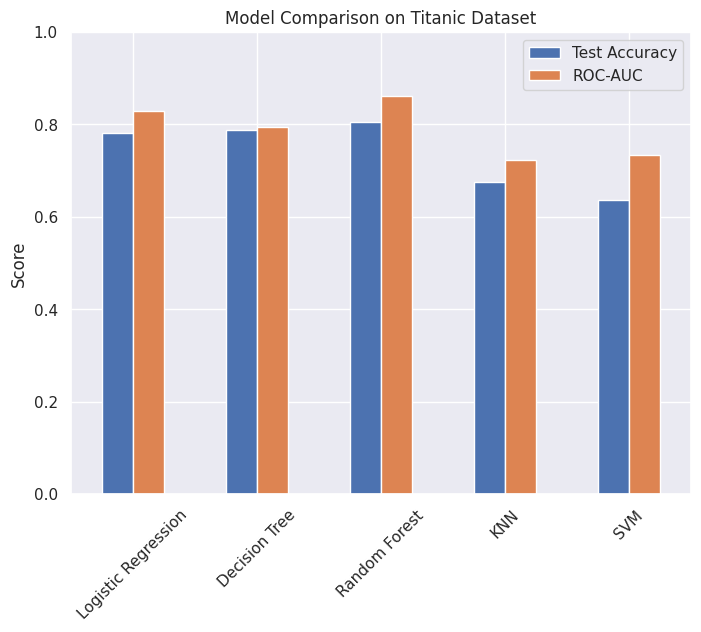

In [ ]:
summary_df[["Test Accuracy","ROC-AUC"]].plot(kind="bar", figsize=(8,6))
plt.title("Model Comparison on Titanic Dataset")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

Random Forest achieved the best performance among all models.